In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv
/kaggle/input/student-stress-monitoring-datasets/Stress_Dataset.csv


In [25]:
import pandas as pd 
import numpy as np
import sklearn as sk
from sklearn.datasets import load_wine
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
# Importing the dataset
wine_data = load_wine()

data = pd.DataFrame(data=wine_data.data, columns= wine_data.feature_names)
data['target'] = wine_data.target
data.head(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


In [27]:
# Fining the shape of the data 
def shape(data):
    rows = len(data)
    col = len(data.columns)
    return rows, col

r,c = shape(data)

print("Size of the data is: ",r,' x ',c, ". Meaning it has ",r," rows and ",c," columns")

Size of the data is:  178  x  14 . Meaning it has  178  rows and  14  columns


In [28]:
from sklearn.model_selection import train_test_split
# Dividing the data into rows and columns
X = data.drop('target',axis=1)
Y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [30]:
# Compute descriptive statistics (mean, median, variance, and standard deviation) for all numeric columns.
for col in X.columns:
    print(f"{col} has a {data[col].mean():.2f} mean, {data[col].median():.2f} median")
    print(f"They also have a {data[col].var():.2f} Variance, and {data[col].std():.2f} Standard Deviation")
    print()

alcohol has a 13.00 mean, 13.05 median
They also have a 0.66 Variance, and 0.81 Standard Deviation

malic_acid has a 2.34 mean, 1.87 median
They also have a 1.25 Variance, and 1.12 Standard Deviation

ash has a 2.37 mean, 2.36 median
They also have a 0.08 Variance, and 0.27 Standard Deviation

alcalinity_of_ash has a 19.49 mean, 19.50 median
They also have a 11.15 Variance, and 3.34 Standard Deviation

magnesium has a 99.74 mean, 98.00 median
They also have a 203.99 Variance, and 14.28 Standard Deviation

total_phenols has a 2.30 mean, 2.35 median
They also have a 0.39 Variance, and 0.63 Standard Deviation

flavanoids has a 2.03 mean, 2.13 median
They also have a 1.00 Variance, and 1.00 Standard Deviation

nonflavanoid_phenols has a 0.36 mean, 0.34 median
They also have a 0.02 Variance, and 0.12 Standard Deviation

proanthocyanins has a 1.59 mean, 1.56 median
They also have a 0.33 Variance, and 0.57 Standard Deviation

color_intensity has a 5.06 mean, 4.69 median
They also have a 5.37 

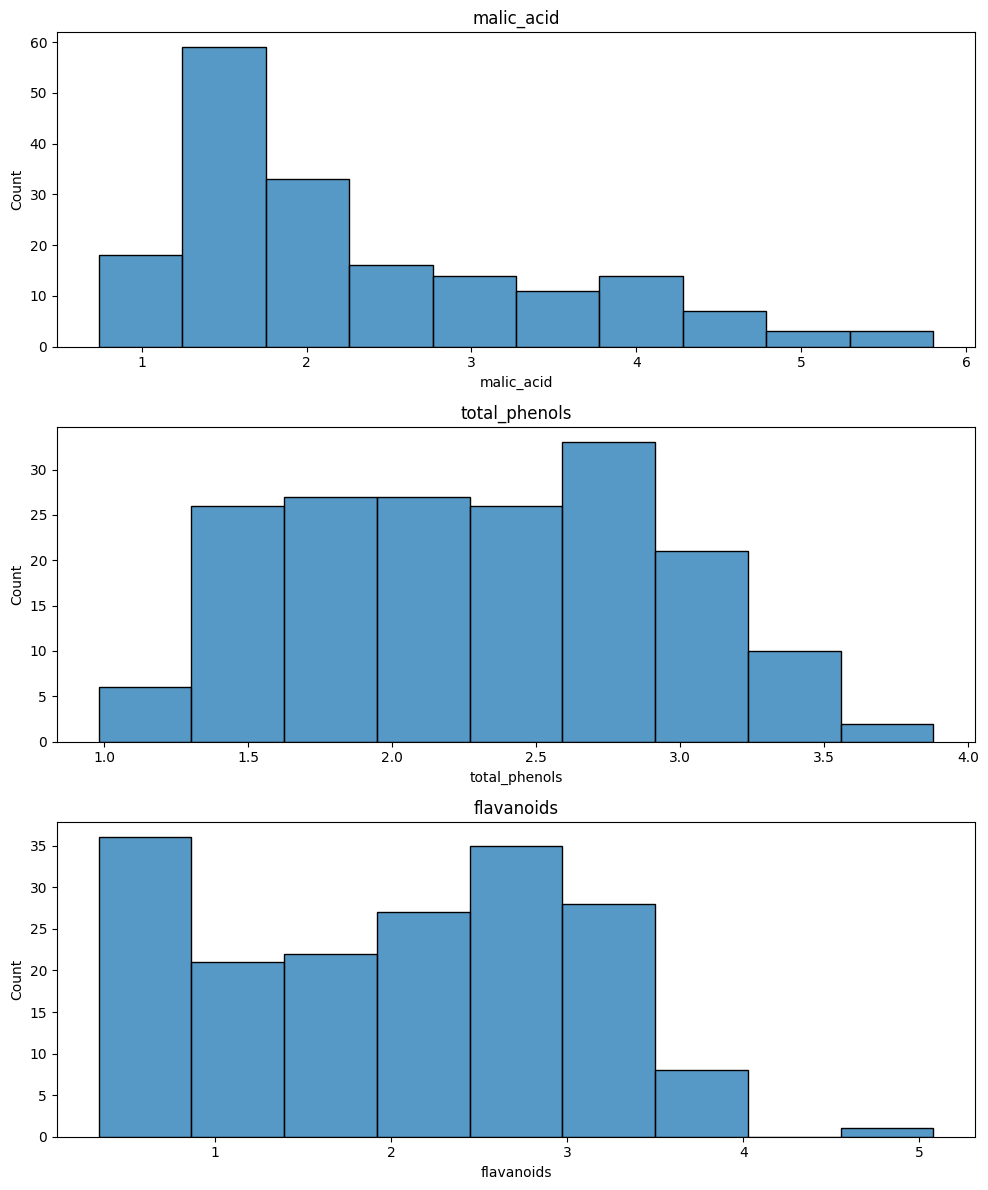

In [31]:
plot_cols = ['malic_acid','total_phenols','flavanoids']
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting Histogram
plt.figure(figsize=(10,12))
for col, ind in enumerate(plot_cols):
    plt.subplot(3,1,col+1)
    sns.histplot(data=data[ind])
    plt.title(ind)

plt.tight_layout()
plt.show()

In [32]:
# Create a Python list containing 15 numbers and calculate both the mean and median.
import random 
lists = []
count = 0
number = 15
for i in range(number):
    num = random.randint(1,20)
    lists.append(num)
    count = count + num

lists.sort()

if number % 2 == 0:
    mid1 = number // 2 - 1
    mid2 = number // 2
    median = (lists[mid1] + lists[mid2]) / 2
else:
    median = lists[number // 2]

mean = count/len(lists)
print(f"Mean is: {mean:.2f}, Median is: {median}")


Mean is: 10.80, Median is: 13


In [33]:
# Define a function that takes a list of values and outputs a summary dictionary with
# count, mean, min, max, and standard deviation.
def summary(val):
    summ = sum(val)
    count = len(val)
    mean = summ/count
    minn = min(val)
    maxx = max(val)
    # std = std(val)
    dic = {'Sum':summ,'Count':count, 'Mean':mean,'Min':minn,'Max':maxx}
    data = pd.Series(dic)
    return data

val = [random.randint(1,20) for _ in range(30)]
summary(val)
# print(val)


Sum      274.000000
Count     30.000000
Mean       9.133333
Min        2.000000
Max       19.000000
dtype: float64

In [34]:
# Generate a 6x6 matrix filled with random integers between 1 and 50, then print it.
data = [[random.randint(1,50) for _ in range(6)] for _ in range(6)]
data

[[7, 19, 49, 49, 22, 29],
 [28, 30, 14, 17, 46, 10],
 [6, 42, 18, 6, 14, 21],
 [4, 19, 21, 23, 30, 43],
 [2, 25, 19, 6, 15, 34],
 [19, 41, 2, 38, 6, 2]]

In [35]:
# Read a CSV file into a Pandas DataFrame and display the .info() and .describe() summaries.
# As I am creating this file on Kaggle, it has its own format for 
stress = pd.read_csv('/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv')
print(stress.info())
print('----'*22)
print('----'*22)
print(stress.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [36]:
# Build and train a simple linear regression model using Scikit-Learn on any dataset,
# and print both the coefficients and intercept.

from sklearn.linear_model import LinearRegression

X = stress.drop(columns=['stress_level'])
Y = stress['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Model's Coefficients are {model.coef_[0]:.3f}, while Intercept is {model.intercept_:.3f}")
from sklearn.metrics import mean_squared_error

err = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is ",err)


Model's Coefficients are -0.003, while Intercept is 0.861
Mean Squared Error is  0.14076890911661938


In [37]:
#  Imputing data 
from sklearn.impute import KNNImputer
imp = KNNImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)


In [38]:
# Normalize one numerical column in the dataset using Min-Max scaling and print the first 10 transformed values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print('Before Normalizing')
print(X['anxiety_level'].head(10))
X['anxiety_level'] = scaler.fit_transform(X[['anxiety_level']])
print('After Normalizing')
print(X['anxiety_level'].head(10))


Before Normalizing
0    14
1    15
2    12
3    16
4    16
5    20
6     4
7    17
8    13
9     6
Name: anxiety_level, dtype: int64
After Normalizing
0    0.666667
1    0.714286
2    0.571429
3    0.761905
4    0.761905
5    0.952381
6    0.190476
7    0.809524
8    0.619048
9    0.285714
Name: anxiety_level, dtype: float64


<Axes: xlabel='anxiety_level', ylabel='depression'>

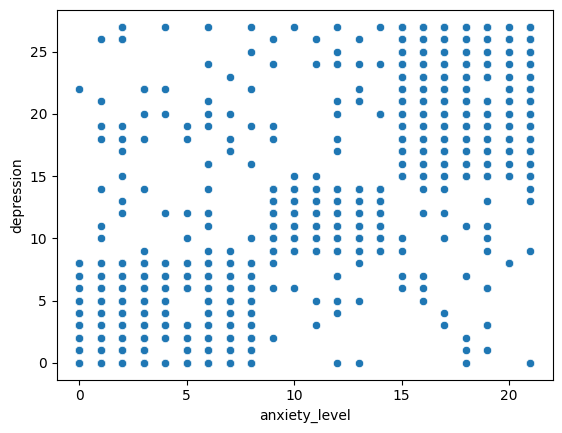

In [39]:
# Plot a scatterplot between two numerical features from the dataset to observe their relationship.
sns.scatterplot(data= stress, x='anxiety_level', y='depression')


<Axes: >

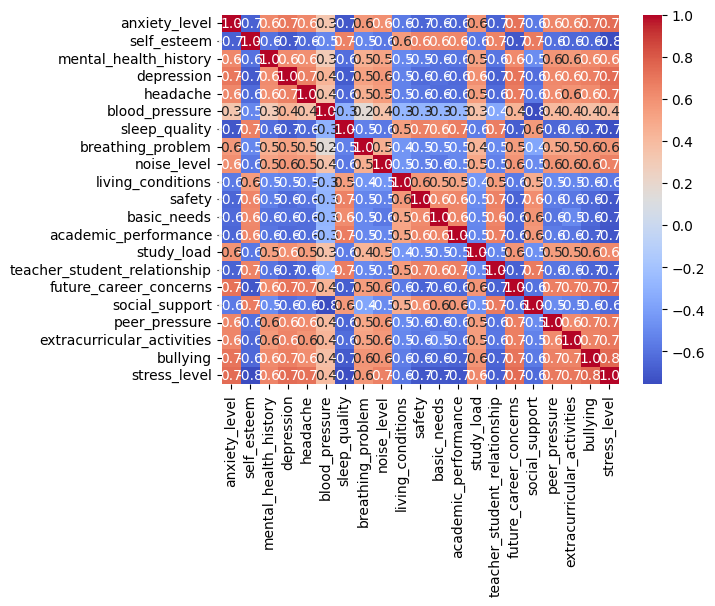

In [40]:
# Implement a correlation heatmap for all numerical features in the dataset using Seaborn or Matplotlib.
plt.Figure(figsize=(20,10))
sns.heatmap(stress.corr(), annot=True, cmap='coolwarm', fmt='.1f')

<Axes: >

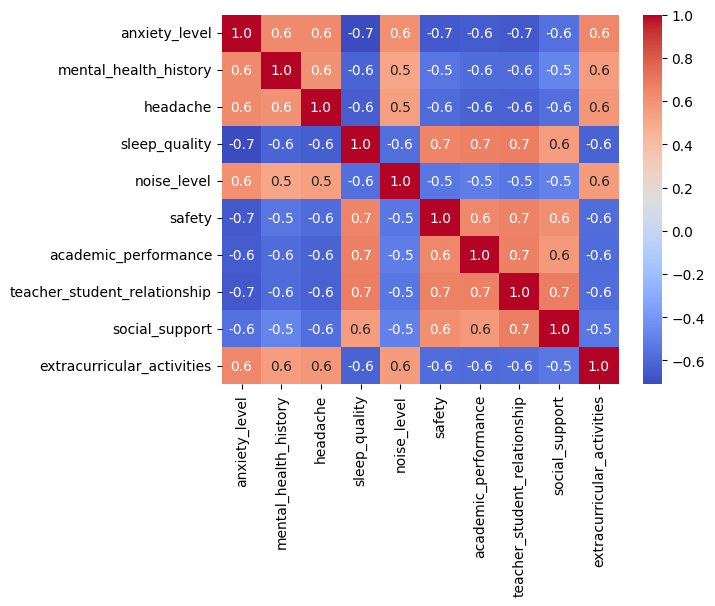

In [41]:
cols = [col for i,col in enumerate(X.columns) if i%2 == 0]
plt.Figure(figsize=(20,10))
sns.heatmap(stress[cols].corr(), annot=True, cmap='coolwarm', fmt='.1f')

In [42]:
# Save a cleaned version of your dataset (with missing values handled) into a new CSV file.
data = X.to_csv(index = False)
# As I don't have nulls so I am saving it as it is